## 2 - Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2.1 Data Collection

In [2]:
SENSOR = 'pressure'
CITY = 'Seattle'
df = pd.read_csv('../data/{}.csv'.format(SENSOR))
df_origin = pd.DataFrame(df[['datetime', CITY]])
df_origin.columns = ['datetime', SENSOR]

In [3]:
df_origin.head(3)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1027.0
2,2012-10-01 14:00:00,1027.0


### 2.2 Transformers

In [4]:
import sys
sys.path.append('code/')

In [5]:
from custom_transformers import MissingValuesTransformer, AutoCorrelationFeaturesTransformer

### 2.3 Data preparation pipeline

In [6]:
from sklearn.pipeline import Pipeline

ACF_THRESHOLD = .9 # It has a great impact on the quality of the predictions.

pipe = Pipeline([
    ('missing_values', MissingValuesTransformer(index="datetime", column=SENSOR)),
    ('feature_engineering', AutoCorrelationFeaturesTransformer(
        acf_threshold=ACF_THRESHOLD, index="datetime", column=SENSOR
    )),
])

df = pipe.fit_transform(df_origin)

In [7]:
df.head(3)

,datetime,pressure,pressure-h-1,pressure-h-2,pressure-h-3,pressure-h-4,pressure-h-5
5,2012-10-01 18:00:00,1030.0,1029.0,1028.0,1028.0,1027.0,1027.0
6,2012-10-01 19:00:00,1031.0,1030.0,1029.0,1028.0,1028.0,1027.0
7,2012-10-01 20:00:00,1031.0,1031.0,1030.0,1029.0,1028.0,1028.0


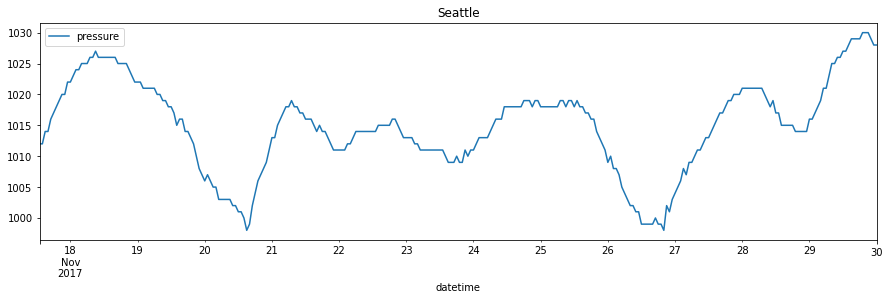

In [8]:
df.set_index('datetime').tail(300)[SENSOR].plot(title=CITY, legend=True, figsize=(15,4))
plt.show()

In [9]:
df[SENSOR].describe()

count    45247.000000
mean      1020.997812
std          9.738228
min        980.000000
25%       1015.000000
50%       1020.000000
75%       1027.000000
max       1058.000000
Name: pressure, dtype: float64

### 2.4 Save pipeline

In [10]:
from joblib import dump

In [11]:
dump(pipe, 'model/{}_{}_data_preparation.joblib'.format(CITY, SENSOR))

['model/Seattle_pressure_data_preparation.joblib']